##Selecting 50000 rows of data for modeling

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_full = pd.read_csv("/content/drive/MyDrive/Modern AI Project/amazon_reviews_us_Beauty_v1_00.tsv", sep = "\t", on_bad_lines='skip')


ValueError: ignored

In [ ]:
#labeling the columns
df_full.columns = ['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'star_rating',
            'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_body', 'review_date']

print(df_full.head())

  marketplace  customer_id       review_id  product_id  product_parent  \
0          US      1797882  R3I2DHQBR577SS  B001ANOOOE         2102612   
1          US     18381298  R1QNE9NQFJC2Y4  B0016J22EQ       106393691   
2          US     19242472  R3LIDG2Q4LJBAO  B00HU6UQAG       375449471   
3          US     19551372  R3KSZHPAEVPEAL  B002HWS7RM       255651889   
4          US     14802407   RAI2OIG50KZ43  B00SM99KWU       116158747   

                                       product_title product_category  \
0  The Naked Bee Vitmin C Moisturizing Sunscreen ...           Beauty   
1      Alba Botanica Sunless Tanning Lotion, 4 Ounce           Beauty   
2          Elysee Infusion Skin Therapy Elixir, 2oz.           Beauty   
3  Diane D722 Color, Perm And Conditioner Process...           Beauty   
4  Biore UV Aqua Rich Watery Essence SPF50+/PA+++...           Beauty   

  star_rating  helpful_votes  total_votes vine verified_purchase  \
0           5            0.0          0.0    N  

In [ ]:
# set the random seed for replicability
np.random.seed(47)

# randomly select 500000 row indices (excluding the first row)
subset_indices = np.random.choice(df_full.index[1:], size=500000, replace=False)

# add the first row to the subset
subset_indices = np.concatenate(([0], subset_indices))

# select the subset of rows and shuffle them
df = df_full.loc[subset_indices].sample(frac=1)

# write the subset to a new CSV file
df.to_csv('df.csv', index=False)


In [ ]:
df = pd.read_csv("df.csv")

<ipython-input-13-13453a00227b>:1: DtypeWarning: Columns (1,4,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df.csv")


In [ ]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,2144007,R2NXX2SOXDCAIL,B000TBW0NA,854096552,"Opi Avoplex Nail and Cuticle Replenishing Oil,...",Beauty,5,2.0,2.0,N,Y,Five Stars,I love it!! My nails are really growing!,2015-08-04
1,US,23496484,R21HIXCSP7ZP6N,B00GQJR25A,256600215,"PuffCuff Original 5""",Beauty,5,0.0,1.0,N,Y,great product,Perfect for my hair. Works great. I gather my ...,2015-04-12
2,US,50297424,R1YU6KE8MVMSAY,B010QXBXGU,261586866,Hot Cold Unscented Eye Pillow and Free Eye Mas...,Beauty,5,0.0,0.0,N,N,... this for the past few days and it works gr...,I have been using this for the past few days a...,2015-08-24
3,US,20926165,R3POM2E1YTWWE8,B001TESDY6,808594229,Advanced Revitalift Anti-Aging Glycolic Mini-P...,Beauty,5,0.0,0.0,N,Y,It is the best,When they stopped selling it in stores my hear...,2013-07-02
4,US,930288,R2GAXR297KRXWM,B00DY860G8,541993171,Joico Smooth Cure Shampoo & Conditioner For Cu...,Beauty,3.0,0.0,0.0,N,N,Leaves a film,I don't know whether it's the shampoo or condi...,2014-11-11


In [ ]:
import matplotlib.pyplot as plt

(array([156436., 150294.,  67958.,  39254.,  24626.,  16428.,  11101.,
          7746.,   5692.,   4300.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

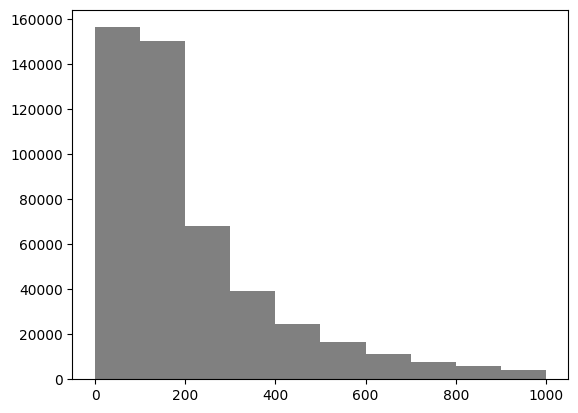

In [ ]:
def len_of_str(x):
    if type(x) != float:
        leng = len(x)
    else:
        leng = 0
    return leng

plt.hist(df['review_body'].apply(len_of_str), range=[0, 1000], facecolor='gray', align='mid')

# Most reviews are shorter length, we can probably limit the string length to 400 characters and below

In [ ]:
df.nunique()

marketplace               2
customer_id          445468
review_id            500001
product_id           167412
product_parent       173952
product_title        151915
product_category          6
star_rating              18
helpful_votes           584
total_votes             626
vine                      3
verified_purchase         3
review_headline      276605
review_body          469354
review_date            4183
dtype: int64

In [ ]:
df['product_category'].unique()

array(['Beauty',
       "Incredibly over priced for what they claim it can do. The thing is, this shampoo and conditioner behave as nothing more than watered down average shampoo and conditioner, which I strongly believe it is. I have given it ample time, trust me I have and I really wanted it to work. I could go on and on with the specifics as to what is wrong with these products. Such as the email I received from the company stating: &#34;A little bit goes a long way&#34; or, &#34;you can use it as often as you like because it's so gentle.&#34; I really wanted to believe these statements, but it's crap. A little bit does NOT go a long way. No matter how much you use, no matter if your hair is reasonably clean by a day or two or by a bi-weekly cleaning, it clumps in one spot on your scalp and you have to use three to four times the amount you would use with another shampoo, just to get it all the way through your hair. It is just as drying and harsh as a $4.50 bottle of shampoo. The f

In [ ]:
df=df[df['product_category']=='Beauty'].reset_index(drop=True)

In [ ]:
df['product_category'].unique()

array(['Beauty'], dtype=object)

In [ ]:
d1 = df.index[df['product_category'] == '2014-11-05']
d2= df.index[df['product_category'] == '2015-02-20']
#remove dates from

In [ ]:
d1

Int64Index([], dtype='int64')

In [ ]:
d2

Int64Index([], dtype='int64')

In [ ]:
# df['product_category'] = df['product_category'].replace(['2014-11-05', '2015-02-20'], 'Beauty')

In [ ]:
df['star_rating'].unique()

array(['5', '3.0', '1', '5.0', '4', '3', '4.0', '2', '2.0', '1.0', 5.0,
       2.0, 1.0, 4.0, 3.0], dtype=object)

In [ ]:
df['product_title'] = df['product_title'].astype(str)
df['review_body'] = df['review_body'].astype(str)
df['review_headline'] = df['review_headline'].astype(str)

In [ ]:
df['star_rating'] = df['star_rating'].astype(float)#float

In [ ]:
df['star_rating'] = df['star_rating'].astype(int)#float

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499996 entries, 0 to 499995
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        499996 non-null  object
 1   customer_id        499996 non-null  object
 2   review_id          499996 non-null  object
 3   product_id         499996 non-null  object
 4   product_parent     499996 non-null  object
 5   product_title      499996 non-null  object
 6   product_category   499996 non-null  object
 7   star_rating        499996 non-null  int64 
 8   helpful_votes      499996 non-null  object
 9   total_votes        499996 non-null  object
 10  vine               499996 non-null  object
 11  verified_purchase  499996 non-null  object
 12  review_headline    499996 non-null  object
 13  review_body        499996 non-null  object
 14  review_date        499991 non-null  object
dtypes: int64(1), object(14)
memory usage: 57.2+ MB


### DATA CLEANUP PHASE

In [ ]:
import re
import string
from gensim.parsing.preprocessing import remove_stopwords

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = remove_stopwords(text)
    return text

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499996 entries, 0 to 499995
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        499996 non-null  object
 1   customer_id        499996 non-null  object
 2   review_id          499996 non-null  object
 3   product_id         499996 non-null  object
 4   product_parent     499996 non-null  object
 5   product_title      499996 non-null  object
 6   product_category   499996 non-null  object
 7   star_rating        499996 non-null  int64 
 8   helpful_votes      499996 non-null  object
 9   total_votes        499996 non-null  object
 10  vine               499996 non-null  object
 11  verified_purchase  499996 non-null  object
 12  review_headline    499996 non-null  object
 13  review_body        499996 non-null  object
 14  review_date        499991 non-null  object
dtypes: int64(1), object(14)
memory usage: 57.2+ MB


In [ ]:
# check for missing values in the 'product_title' column
print(df['product_title'].isnull().sum())

0


In [ ]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          5
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

In [ ]:
# Applying text cleaning lowercasing and removing punctuation to from all text columns

# select only the string columns to be cleaned
string_columns = ['product_title', 'review_headline', 'review_body']

# apply the clean_text function to all selected columns
df[string_columns] = df[string_columns].applymap(clean_text)

In [ ]:
df.head(2)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,2144007,R2NXX2SOXDCAIL,B000TBW0NA,854096552,opi avoplex nail cuticle replenishing oil flui...,Beauty,5,2.0,2.0,N,Y,stars,love nails growing,2015-08-04,1
1,US,23496484,R21HIXCSP7ZP6N,B00GQJR25A,256600215,puffcuff original,Beauty,5,0.0,1.0,N,Y,great product,perfect hair works great gather hair ponytail ...,2015-04-12,1


In [ ]:
df = pd.read_csv('df_clean.csv')

In [ ]:
# Define a function to apply to each row
def rating_to_binary(sentiment):
    if sentiment > 3:
        return 1
    else:
        return 0

# Apply the function to the 'star_rating' column and create a new column 'binary_rating'
df['sentiment'] = df['star_rating'].apply(rating_to_binary)

In [ ]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,2144007,R2NXX2SOXDCAIL,B000TBW0NA,854096552,opi avoplex nail cuticle replenishing oil flui...,Beauty,5,2.0,2.0,N,Y,stars,love nails growing,2015-08-04,1
1,US,23496484,R21HIXCSP7ZP6N,B00GQJR25A,256600215,puffcuff original,Beauty,5,0.0,1.0,N,Y,great product,perfect hair works great gather hair ponytail ...,2015-04-12,1
2,US,50297424,R1YU6KE8MVMSAY,B010QXBXGU,261586866,hot cold unscented eye pillow free eye mask sl...,Beauty,5,0.0,0.0,N,N,past days works great unscented,past days works great unscented silky fabric i...,2015-08-24,1
3,US,20926165,R3POM2E1YTWWE8,B001TESDY6,808594229,advanced revitalift antiaging glycolic minipee...,Beauty,5,0.0,0.0,N,Y,best,stopped selling stores heart broke thank goodn...,2013-07-02,1
4,US,930288,R2GAXR297KRXWM,B00DY860G8,541993171,joico smooth cure shampoo conditioner curly fr...,Beauty,3,0.0,0.0,N,N,leaves film,dont know shampoo conditioner product leaves g...,2014-11-11,0


In [ ]:
print(df['review_body'].dtype)

object


In [ ]:
df['star_rating'] = df['star_rating'].astype(float).astype(int)
df['review_body'] = df['review_body'].astype(str)

In [ ]:
### Downlad dataset after data cleanup
df.to_csv("df_clean1.csv", index = False)

In [ ]:
df['star_rating'] = df['star_rating'].astype(int)#float
df['product_title'] = df['product_title'].astype(str)
df['review_body'] = df['review_body'].astype(str)
df['review_headline'] = df['review_headline'].astype(str)

In [ ]:
df['product_title'] = df['product_title'].apply(clean_text)
df['review_body'] = df['review_body'].apply(clean_text)
df['review_headline'] = df['review_headline'].apply(clean_text)
display(df.head())

In [ ]:
from collections import Counter
print(Counter(df['product_title']).most_common(10))

In [ ]:
title_counts = df['product_title'].value_counts()
title_counts.head()

In [ ]:
a = (df.groupby('product_title')['product_parent'].nunique().plot.bar())

leng = len(pd.unique(df['product_parent']))
print("", leng)

In [ ]:
d = df.groupby('product_title')['review_body'].agg('count')
d.sort_values(ascending=False).plot.bar()

In [ ]:
#LATER
#df = df.dropna()
#df['star_rating'] = pd.to_numeric(df['star_rating'], errors='coerce')
#df = df.dropna(subset=['star_rating'])
df = df[df['star_rating'].isin(['1', '2', '3', '4', '5'])]
df['sentiment'] = np.where(df['star_rating']>=3, 'positive', 'negative')
#df = df[['product_title','review_body', 'sentiment']]

In [ ]:
df.head()

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline
text = df.product_title[1]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##LSTM

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

In [ ]:
df = pd.read_csv('df_clean1.csv')

In [ ]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,2144007,R2NXX2SOXDCAIL,B000TBW0NA,854096552,opi avoplex nail cuticle replenishing oil flui...,Beauty,5,2.0,2.0,N,Y,stars,love nails growing,2015-08-04,1
1,US,23496484,R21HIXCSP7ZP6N,B00GQJR25A,256600215,puffcuff original,Beauty,5,0.0,1.0,N,Y,great product,perfect hair works great gather hair ponytail ...,2015-04-12,1
2,US,50297424,R1YU6KE8MVMSAY,B010QXBXGU,261586866,hot cold unscented eye pillow free eye mask sl...,Beauty,5,0.0,0.0,N,N,past days works great unscented,past days works great unscented silky fabric i...,2015-08-24,1
3,US,20926165,R3POM2E1YTWWE8,B001TESDY6,808594229,advanced revitalift antiaging glycolic minipee...,Beauty,5,0.0,0.0,N,Y,best,stopped selling stores heart broke thank goodn...,2013-07-02,1
4,US,930288,R2GAXR297KRXWM,B00DY860G8,541993171,joico smooth cure shampoo conditioner curly fr...,Beauty,3,0.0,0.0,N,N,leaves film,dont know shampoo conditioner product leaves g...,2014-11-11,0


In [ ]:
# Define a function to apply to each row
def rating_to_binary(sentiment):
    if sentiment > 3:
        return 1
    else:
        return 0

# Apply the function to the 'star_rating' column and create a new column 'binary_rating'
df['sentiment'] = df['star_rating'].apply(rating_to_binary)

In [ ]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,2144007,R2NXX2SOXDCAIL,B000TBW0NA,854096552,opi avoplex nail cuticle replenishing oil flui...,Beauty,5,2.0,2.0,N,Y,stars,love nails growing,2015-08-04,1
1,US,23496484,R21HIXCSP7ZP6N,B00GQJR25A,256600215,puffcuff original,Beauty,5,0.0,1.0,N,Y,great product,perfect hair works great gather hair ponytail ...,2015-04-12,1
2,US,50297424,R1YU6KE8MVMSAY,B010QXBXGU,261586866,hot cold unscented eye pillow free eye mask sl...,Beauty,5,0.0,0.0,N,N,past days works great unscented,past days works great unscented silky fabric i...,2015-08-24,1
3,US,20926165,R3POM2E1YTWWE8,B001TESDY6,808594229,advanced revitalift antiaging glycolic minipee...,Beauty,5,0.0,0.0,N,Y,best,stopped selling stores heart broke thank goodn...,2013-07-02,1
4,US,930288,R2GAXR297KRXWM,B00DY860G8,541993171,joico smooth cure shampoo conditioner curly fr...,Beauty,3,0.0,0.0,N,N,leaves film,dont know shampoo conditioner product leaves g...,2014-11-11,0


In [ ]:
# Check which rows have the value 'B001TESDY6' in the 'product_id' column
mask = df['product_id'] == 'B001TESDY6'

# Get the indexes of the rows that match the mask
indexes = df.index[mask]

# Print the indexes
print(indexes)

Int64Index([3, 285127, 316060, 435271], dtype='int64')


In [ ]:
df.loc[3]

marketplace                                                         US
customer_id                                                   20926165
review_id                                               R3POM2E1YTWWE8
product_id                                                  B001TESDY6
product_parent                                               808594229
product_title        advanced revitalift antiaging glycolic minipee...
product_category                                                Beauty
star_rating                                                          5
helpful_votes                                                      0.0
total_votes                                                        0.0
vine                                                                 N
verified_purchase                                                    Y
review_headline                                                   best
review_body          stopped selling stores heart broke thank goodn...
review

In [ ]:
df.loc[285127]

marketplace                                                         US
customer_id                                                   37059327
review_id                                               R3K6MSHLP0IZ2L
product_id                                                  B001TESDY6
product_parent                                               808594229
product_title        advanced revitalift antiaging glycolic minipee...
product_category                                                Beauty
star_rating                                                          4
helpful_votes                                                      4.0
total_votes                                                        4.0
vine                                                                 N
verified_purchase                                                    N
review_headline                                              skin soft
review_body          dont know lift certainly left face feeling sof...
review

In [ ]:
df.loc[435271]

marketplace                                                         US
customer_id                                                   23141507
review_id                                               R2542T608D87A1
product_id                                                  B001TESDY6
product_parent                                               808594229
product_title        advanced revitalift antiaging glycolic minipee...
product_category                                                Beauty
star_rating                                                          4
helpful_votes                                                      0.0
total_votes                                                        0.0
vine                                                                 N
verified_purchase                                                    Y
review_headline                                                  stars
review_body                                        great product works
review

In [ ]:
print(df['review_body'].dtype)

object


In [ ]:
df['star_rating'] = df['star_rating'].astype(float).astype(int)
df['review_body'] = df['review_body'].astype(str)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review_body'], df['sentiment'], test_size=0.2)

# Convert the reviews into sequences
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Add padding to ensure all sequences have the same length
X_train = pad_sequences(X_train, maxlen=100, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=100, padding='post', truncating='post')

# Build the LSTM model
model = Sequential()
model.add(Embedding(5000, 32, input_length=100))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/15
6250/6250 [==============================] - 113s 18ms/step - loss: 0.5054 - accuracy: 0.7797 - val_loss: 0.4858 - val_accuracy: 0.7831
Epoch 2/15
6250/6250 [==============================] - 64s 10ms/step - loss: 0.5014 - accuracy: 0.7798 - val_loss: 0.5216 - val_accuracy: 0.7838
Epoch 3/15
6250/6250 [==============================] - 56s 9ms/step - loss: 0.4690 - accuracy: 0.8026 - val_loss: 0.4509 - val_accuracy: 0.7792
Epoch 4/15
6250/6250 [==============================] - 60s 10ms/step - loss: 0.4574 - accuracy: 0.8138 - val_loss: 0.4634 - val_accuracy: 0.8156
Epoch 5/15
6250/6250 [==============================] - 60s 10ms/step - loss: 0.4572 - accuracy: 0.8222 - val_loss: 0.4498 - val_accuracy: 0.8229
Epoch 6/15
6250/6250 [==============================] - 54s 9ms/step - loss: 0.4493 - accuracy: 0.8156 - val_loss: 0.4311 - val_accuracy: 0.8289
Epoch 7/15
6250/6250 [==============================] - 57s 9ms/step - loss: 0.4454 - accuracy: 0.8265 - val_loss: 0.4447 - v

#Finding which products have received more number of positive feedback, and vice versa!

In [ ]:
# Flatten X_test into a one-dimensional array
X_test_1d = X_test.flatten()

# Convert X_test to a DataFrame with the original review_body column
X_test_df = pd.DataFrame({'review_body': X_test_1d})

# Create a separate DataFrame for the predicted sentiment scores and product IDs
y_pred_df = pd.DataFrame({'sentiment': y_pred})
product_ids_df = pd.DataFrame({'product_id': df.loc[X_test_df.index, 'product_id'].values})

# Concatenate the DataFrames
result_df = pd.concat([X_test_df, y_pred_df, product_ids_df], axis=1)

agg_df = result_df.groupby('product_id')['sentiment'].mean().reset_index()

print(agg_df)

# Not allowing me to run it

## BERT

In [ ]:
# dfbeauty = pd.read_pickle("data.pkl")

# sentdf = dfbooks[['product_parent','discipline', 'review_body', 'review_date', 'star_rating']]

In [ ]:
# Install libraries and dependencies
import tensorflow as tf
num_gpus_available = len(tf.config.experimental.list_physical_devices('GPU'))
print("Num GPUs Available: ", num_gpus_available)
assert num_gpus_available > 0
!pip install transformers
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification
import pandas as pd
import numpy as np

Num GPUs Available:  1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv('df_clean1.csv')

In [ ]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,2144007,R2NXX2SOXDCAIL,B000TBW0NA,854096552,opi avoplex nail cuticle replenishing oil flui...,Beauty,5,2.0,2.0,N,Y,stars,love nails growing,2015-08-04,1
1,US,23496484,R21HIXCSP7ZP6N,B00GQJR25A,256600215,puffcuff original,Beauty,5,0.0,1.0,N,Y,great product,perfect hair works great gather hair ponytail ...,2015-04-12,1
2,US,50297424,R1YU6KE8MVMSAY,B010QXBXGU,261586866,hot cold unscented eye pillow free eye mask sl...,Beauty,5,0.0,0.0,N,N,past days works great unscented,past days works great unscented silky fabric i...,2015-08-24,1
3,US,20926165,R3POM2E1YTWWE8,B001TESDY6,808594229,advanced revitalift antiaging glycolic minipee...,Beauty,5,0.0,0.0,N,Y,best,stopped selling stores heart broke thank goodn...,2013-07-02,1
4,US,930288,R2GAXR297KRXWM,B00DY860G8,541993171,joico smooth cure shampoo conditioner curly fr...,Beauty,3,0.0,0.0,N,N,leaves film,dont know shampoo conditioner product leaves g...,2014-11-11,0


In [ ]:
df.isnull().sum()

marketplace             0
customer_id             0
review_id               0
product_id              0
product_parent          0
product_title         683
product_category        0
star_rating             0
helpful_votes           0
total_votes             0
vine                    0
verified_purchase       0
review_headline      3879
review_body           748
review_date             0
sentiment               0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
sentiment            0
dtype: int64

In [ ]:
from transformers import BertTokenizer
from transformers import TFBertForSequenceClassification

# Split the data into train and test sets
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the data
def tokenize_data(texts, tokenizer, max_length):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='tf'
        )

        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    return tf.convert_to_tensor(input_ids), tf.convert_to_tensor(attention_masks)

max_length = 128

# Tokenize the train and test data
x_train, y_train = tokenize_data(train_df['review_body'].tolist(), tokenizer, max_length), train_df['sentiment'].tolist()
x_test, y_test = tokenize_data(test_df['review_body'].tolist(), tokenizer, max_length), test_df['sentiment'].tolist()

# Load the BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=16)

# Evaluate the model
model.evaluate(x_test, y_test)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
reviews = df['review_body'].values.tolist()
labels = df['sentiment'].tolist()

# Split data

In [ ]:
from sklearn.model_selection import train_test_split
training_sentences, validation_sentences, training_labels, validation_labels = train_test_split(reviews, labels, test_size=.2)

In [ ]:
# Convert training sentences to list of strings
training_sentences = [str(sentence) for sentence in training_sentences]
validation_sentences = [str(sentence) for sentence in validation_sentences]

# Check the length of the training sentences
print("Number of training sentences: ", len(training_sentences))

Number of training sentences:  395772


In [ ]:
#Assign tokenizer object to the tokenizer class
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
tokenizer([training_sentences[0]], truncation=True,

                            padding=True, max_length=128)

{'input_ids': [[101, 3728, 4156, 4031, 2303, 12831, 3688, 2293, 2307, 3976, 2307, 3643, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

Tensor API

In [ ]:
train_encodings = tokenizer(training_sentences,
                            truncation=True,
                            padding=True)
val_encodings = tokenizer(validation_sentences,
                            truncation=True,
                            padding=True)
train_dataset = tf.data.Dataset.from_tensor_slices((
                            dict(train_encodings),
                            training_labels
                            ))
val_dataset = tf.data.Dataset.from_tensor_slices((
                            dict(val_encodings),
                            validation_labels
                            ))

# Model Training & Optimization

In [ ]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=2)

In [ ]:
# FROM JUPYTER
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)
def custom_loss(y_true, y_pred):
    mask = tf.math.logical_not(tf.math.equal(y_true, 0))
    loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)
    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask
    return tf.reduce_mean(loss)
model.compile(optimizer=optimizer, loss=custom_loss, metrics=['accuracy'])
model.fit(train_dataset.shuffle(100).batch(16),
          epochs=2,
          batch_size=16,
          validation_data=val_dataset.shuffle(100).batch(16))

In [ ]:
model.save_pretrained("./sentiment")
loaded_model = TFDistilBertForSequenceClassification.from_pretrained("./sentiment")